### Сравнить временные ряды (варианты по методам и наборам данных) с эталонным сигналом и идентифицировать состояние (ЭКГ, работа мотора автомобиля, идентификация состояния оборудования).
##### Посчитать для всех сочетаний значения коэффициентов корреляции (Пирсона, Спирмена, Кендалла) и сделать соответствующие выводы.
##### Посчитать значение DTW для всех сочетаний, сравнить со значениями коэффициентов корреляции, сделать выводы.
##### Посчитать спектральную плотность сигнала. Разложить временные ряды на составляющие.
Данные для примера
h… - нормативная работа подшипника (сигналы с четырех датчиков вибрации)
b… - ненормативная работа подшипника (сигналы с четырех датчиков вибрации) 

In [ ]:

import pandas as pd
import numpy as np
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

data1 = pd.read_csv('b30hz0.txt', sep = "\t", header=None)
data2 = pd.read_csv('h30hz0.txt', sep = "\t", header=None)

data1.rename(columns={0:"s1", 1:"s2", 2:"s3", 3:"s4"}, inplace=True)
data1.drop(columns=[4], inplace=True)

data2.rename(columns={0:"s1", 1:"s2", 2:"s3", 3:"s4"},inplace=True)
data2.drop(columns=[4], inplace=True)

<Axes: >

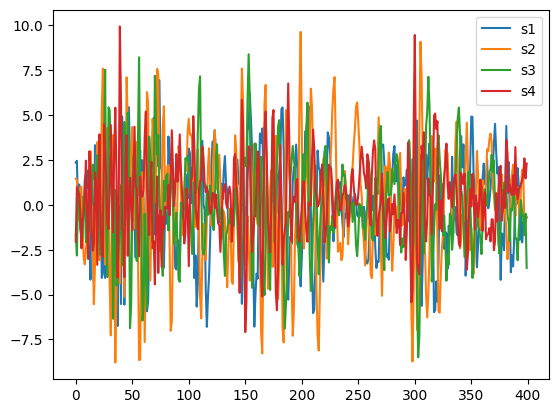

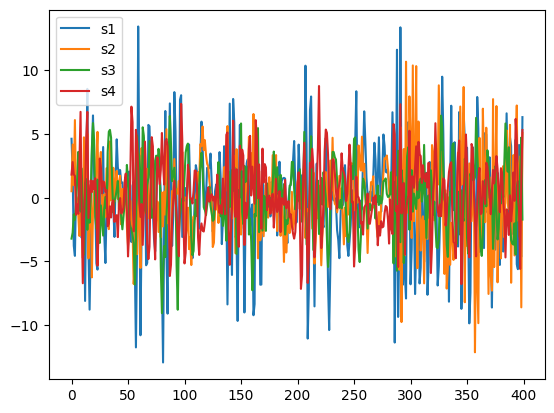

In [4]:
start_idx = 0
end_idx = 400

data1 = data1[start_idx:end_idx]
data2 = data2[start_idx:end_idx]

data1.plot()
data2.plot()


## Корреляция сигналов из набора Data1 

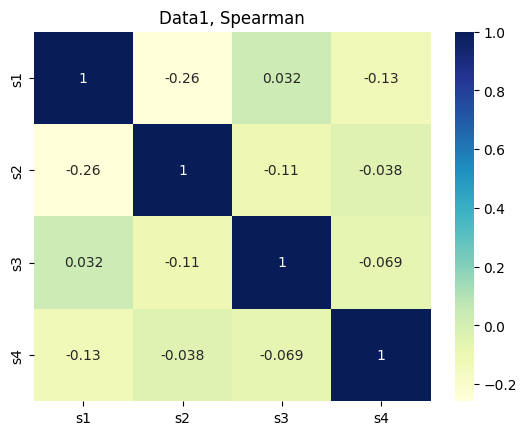

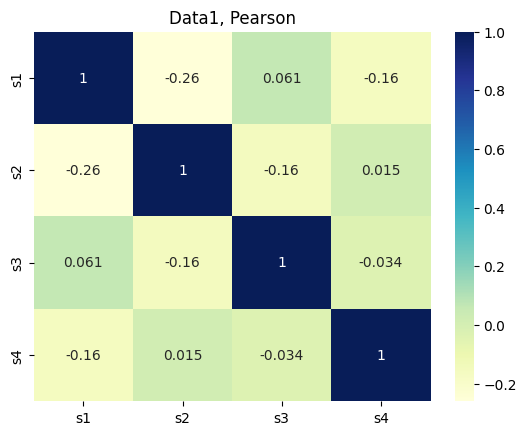

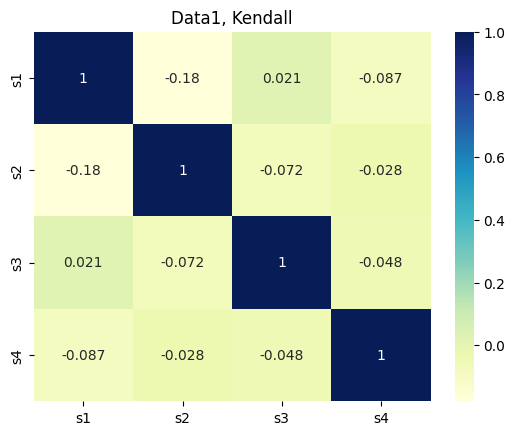

Spearman Correlation:
+----+------------+------------+------------+------------+
|    |         s1 |         s2 |         s3 |         s4 |
|----+------------+------------+------------+------------|
| s1 |  1         | -0.258431  |  0.0323986 | -0.128562  |
| s2 | -0.258431  |  1         | -0.110199  | -0.0381612 |
| s3 |  0.0323986 | -0.110199  |  1         | -0.0692842 |
| s4 | -0.128562  | -0.0381612 | -0.0692842 |  1         |
+----+------------+------------+------------+------------+

Pearson Correlation:
+----+------------+------------+------------+------------+
|    |         s1 |         s2 |         s3 |         s4 |
|----+------------+------------+------------+------------|
| s1 |  1         | -0.260525  |  0.0614607 | -0.158225  |
| s2 | -0.260525  |  1         | -0.155576  |  0.0148284 |
| s3 |  0.0614607 | -0.155576  |  1         | -0.0341115 |
| s4 | -0.158225  |  0.0148284 | -0.0341115 |  1         |
+----+------------+------------+------------+------------+

Kendall Cor

In [48]:
c = data1.corr(method="spearman")
sns.heatmap(c, annot=True, cmap="YlGnBu")
plt.title('Data1, Spearman')
plt.show()

c = data1.corr(method="pearson")
sns.heatmap(c, annot=True, cmap="YlGnBu")
plt.title('Data1, Pearson')
plt.show()

c = data1.corr(method="kendall")
sns.heatmap(c, annot=True, cmap="YlGnBu")
plt.title('Data1, Kendall')
plt.show()

import pandas as pd
from tabulate import tabulate

# Вычисление корреляции для data1
corr_spearman = data1.corr(method="spearman")
corr_pearson = data1.corr(method="pearson")
corr_kendall = data1.corr(method="kendall")

# Преобразование значений корреляции в таблицы pandas
table_spearman = pd.DataFrame(corr_spearman, columns=corr_spearman.columns, index=corr_spearman.index)
table_kendall = pd.DataFrame(corr_kendall, columns=corr_kendall.columns, index=corr_kendall.index)
table_pearson = pd.DataFrame(corr_pearson, columns=corr_pearson.columns, index=corr_pearson.index)

# Вывод таблицы с использованием tabulate
print("Spearman Correlation:")
print(tabulate(table_spearman, headers='keys', tablefmt='psql'))
print("\nPearson Correlation:")
print(tabulate(table_pearson, headers='keys', tablefmt='psql'))
print("\nKendall Correlation:")
print(tabulate(table_kendall, headers='keys', tablefmt='psql'))

## Корреляции из наборов Data2

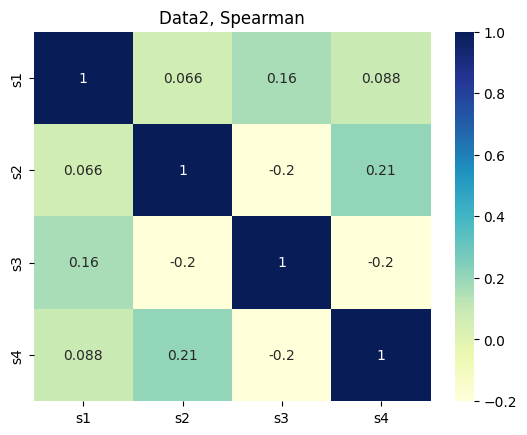

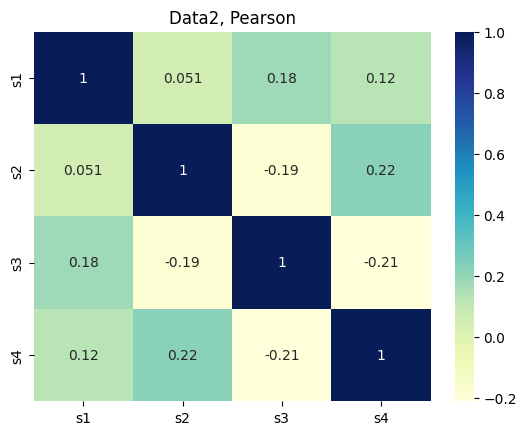

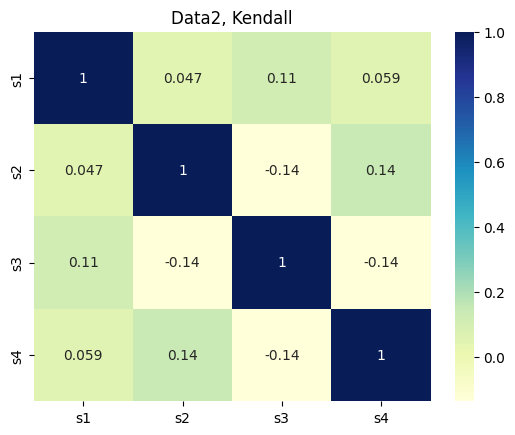

Spearman Correlation:
+----+-----------+-----------+-----------+------------+
|    |        s1 |        s2 |        s3 |         s4 |
|----+-----------+-----------+-----------+------------|
| s1 | 1         |  0.065709 |  0.162458 |  0.0883283 |
| s2 | 0.065709  |  1        | -0.20112  |  0.207883  |
| s3 | 0.162458  | -0.20112  |  1        | -0.200842  |
| s4 | 0.0883283 |  0.207883 | -0.200842 |  1         |
+----+-----------+-----------+-----------+------------+

Pearson Correlation:
+----+-----------+------------+-----------+-----------+
|    |        s1 |         s2 |        s3 |        s4 |
|----+-----------+------------+-----------+-----------|
| s1 | 1         |  0.0510341 |  0.180034 |  0.123673 |
| s2 | 0.0510341 |  1         | -0.190505 |  0.220827 |
| s3 | 0.180034  | -0.190505  |  1        | -0.209866 |
| s4 | 0.123673  |  0.220827  | -0.209866 |  1        |
+----+-----------+------------+-----------+-----------+

Kendall Correlation:
+----+-----------+------------+-------

In [47]:
c = data2.corr(method="spearman")
sns.heatmap(c, annot=True, cmap="YlGnBu")
plt.title('Data2, Spearman')
plt.show()

c = data2.corr(method="pearson")
sns.heatmap(c, annot=True, cmap="YlGnBu")
plt.title('Data2, Pearson')
plt.show()

c = data2.corr(method="kendall")
sns.heatmap(c, annot=True, cmap="YlGnBu")
plt.title('Data2, Kendall')
plt.show()

import pandas as pd
from tabulate import tabulate

# Вычисление корреляции для data1
corr_spearman = data2.corr(method="spearman")
corr_pearson = data2.corr(method="pearson")
corr_kendall = data2.corr(method="kendall")

# Преобразование значений корреляции в таблицы pandas
table_spearman = pd.DataFrame(corr_spearman, columns=corr_spearman.columns, index=corr_spearman.index)
table_kendall = pd.DataFrame(corr_kendall, columns=corr_kendall.columns, index=corr_kendall.index)
table_pearson = pd.DataFrame(corr_pearson, columns=corr_pearson.columns, index=corr_pearson.index)

# Вывод таблицы с использованием tabulate
print("Spearman Correlation:")
print(tabulate(table_spearman, headers='keys', tablefmt='psql'))
print("\nPearson Correlation:")
print(tabulate(table_pearson, headers='keys', tablefmt='psql'))
print("\nKendall Correlation:")
print(tabulate(table_kendall, headers='keys', tablefmt='psql'))

## Кореляция между сигналом наборов Data1 и Data2

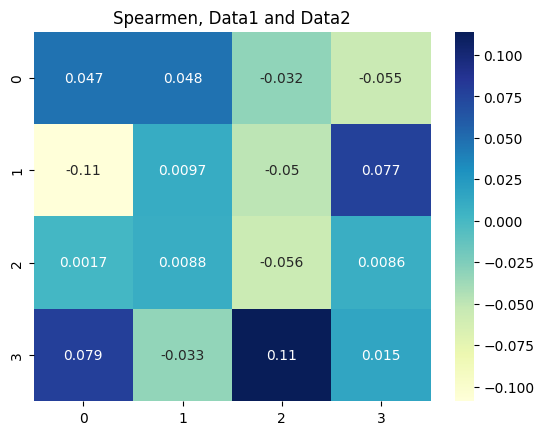

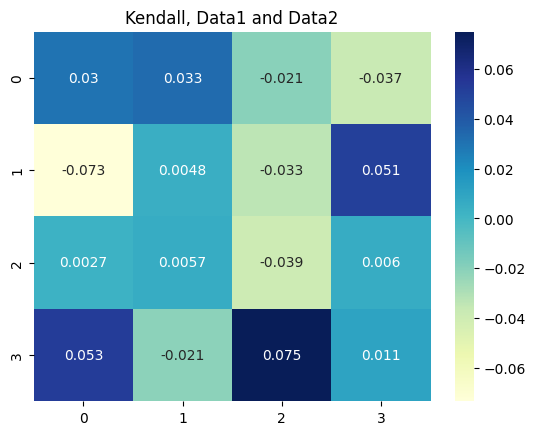

Spearman Correlation:
+----+-------------+-------------+------------+-------------+
|    |          s1 |          s2 |         s3 |          s4 |
|----+-------------+-------------+------------+-------------|
| s1 |  0.0474955  |  0.0476498  | -0.0319685 | -0.0551615  |
| s2 | -0.108854   |  0.00970394 | -0.0495899 |  0.0769718  |
| s3 |  0.00172126 |  0.0087864  | -0.0560961 |  0.00858765 |
| s4 |  0.0786876  | -0.0328151  |  0.114041  |  0.0154013  |
+----+-------------+-------------+------------+-------------+

Kendall Correlation:
+----+-------------+-------------+------------+-------------+
|    |          s1 |          s2 |         s3 |          s4 |
|----+-------------+-------------+------------+-------------|
| s1 |  0.0303008  |  0.0328949  | -0.020564  | -0.0372057  |
| s2 | -0.0734726  |  0.00483721 | -0.0334845 |  0.0512544  |
| s3 |  0.00270677 |  0.00572685 | -0.03891   |  0.00602761 |
| s4 |  0.0525693  | -0.0212283  |  0.0750887 |  0.0106267  |
+----+-------------+------

In [46]:
import pandas as pd
import numpy as np
from tabulate import tabulate
from scipy import stats

corr_res_sp = np.zeros([4, 4])

for i in [0, 1, 2, 3]:
    for j in [0, 1, 2, 3]:
        query = data2.iloc[:, [i]].to_numpy()[:, 0]
        template = data1.iloc[:, [j]].to_numpy()[:, 0]
        corr_res_sp[i, j] = stats.spearmanr(query, template).correlation

sns.heatmap(corr_res_sp, annot=True, cmap="YlGnBu")
plt.title('Spearmen, Data1 and Data2')
plt.show()

corr_res_kd = np.zeros([4, 4])
for i in [0, 1, 2, 3]:
    for j in [0, 1, 2, 3]:
        query = data2.iloc[:, [i]].to_numpy()[:, 0]
        template = data1.iloc[:, [j]].to_numpy()[:, 0]
        corr_res_kd[i, j] = stats.kendalltau(query, template).correlation

sns.heatmap(corr_res_kd, annot=True, cmap="YlGnBu")
plt.title('Kendall, Data1 and Data2')
plt.show()

# Создание DataFrame для таблицы корреляции Спирмена
df_spearman = pd.DataFrame(corr_res_sp, columns=['s1', 's2', 's3', 's4'], index=['s1', 's2', 's3', 's4'])

# Создание DataFrame для таблицы корреляции Кендалла
df_kendall = pd.DataFrame(corr_res_kd, columns=['s1', 's2', 's3', 's4'], index=['s1', 's2', 's3', 's4'])

# Вывод таблиц с использованием tabulate
print("Spearman Correlation:")
print(tabulate(df_spearman, headers='keys', tablefmt='psql'))
print("\nKendall Correlation:")
print(tabulate(df_kendall, headers='keys', tablefmt='psql'))


## DTW

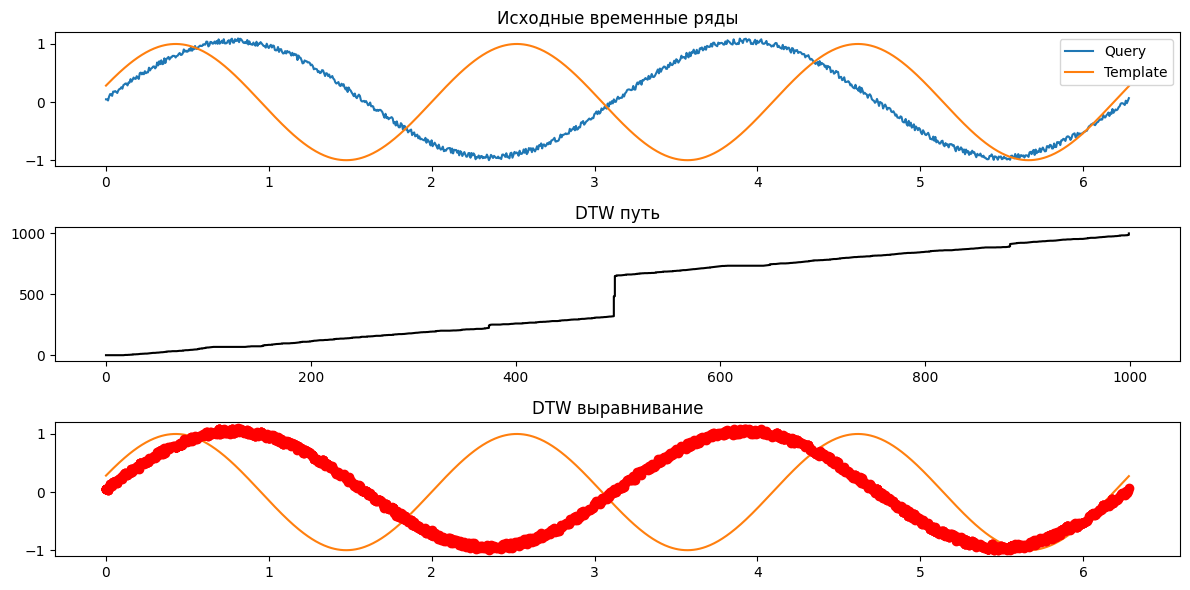

DTW расстояние:  229.37845531625197


In [80]:
# from fastdtw import fastdtw

# # Вычисление DTW
# distance, path = fastdtw(data1.values.flatten(), data2.values.flatten())

# print("DTW расстояние: ", distance)
import numpy as np
from fastdtw import fastdtw
import matplotlib.pyplot as plt

# Создание исходных данных
idx = np.linspace(0, 6.28, num=1000)
query = np.sin(idx * 2) + np.random.uniform(size=1000) / 10.0
template = np.cos(idx * 3 + 5)

# Выполнение DTW
distance, path = fastdtw(query, template)

# Визуализация графика DTW
plt.figure(figsize=(12, 6))

# Исходные временные ряды
plt.subplot(3, 1, 1)
plt.plot(idx, query, label='Query')
plt.plot(idx, template, label='Template')
plt.title('Исходные временные ряды')
plt.legend()

# График DTW пути
plt.subplot(3, 1, 2)
x = [point[0] for point in path]
y = [point[1] for point in path]
plt.plot(x, y, 'k-')
plt.title('DTW путь')

# График выравнивания
plt.subplot(3, 1, 3)
plt.plot(idx, query, label='Query')
plt.plot(idx, template, label='Template')
for point in path:
    plt.plot(idx[point[1]], query[point[1]], 'ro')  # выравнивающие точки
plt.title('DTW выравнивание')

plt.tight_layout()
plt.show()


distance1, path = fastdtw(data1.values.flatten(), data2.values.flatten())
print("DTW расстояние: ", distance)


## DTW Дистанции между сигналами набора Data 1

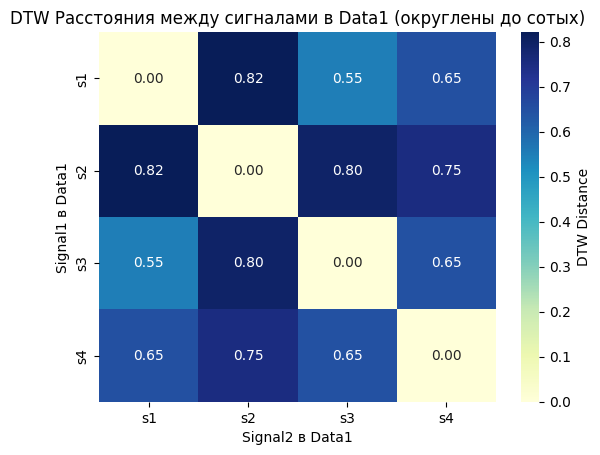

+----+----------+----------+----------+----------+
|    |       s1 |       s2 |       s3 |       s4 |
|----+----------+----------+----------+----------|
| s1 | 0        | 0.820879 | 0.54837  | 0.647952 |
| s2 | 0.820879 | 0        | 0.795177 | 0.753522 |
| s3 | 0.54837  | 0.795177 | 0        | 0.646648 |
| s4 | 0.647952 | 0.753522 | 0.646648 | 0        |
+----+----------+----------+----------+----------+


In [59]:
from fastdtw import fastdtw
import seaborn as sns
import matplotlib.pyplot as plt

# Создание списка для хранения DTW расстояний
dtw_distances_data1 = []

dtw_res = np.zeros([4, 4])
for i in [0, 1, 2, 3]:
    for j in [0, 1, 2, 3]:
        query = data1.iloc[:, [i]].to_numpy()[:, 0]
        template = data1.iloc[:, [j]].to_numpy()[:, 0]
        alignment_distance, _ = fastdtw(query, template)
        dtw_res[i, j] = alignment_distance

# Создание heatmap с использованием pivot
heatmap_data = pd.DataFrame(dtw_res, index=['s1', 's2', 's3', 's4'], columns=['s1', 's2', 's3', 's4'])
heatmap_data /= 1000

# Создание heatmap с использованием pivot с выводом DTW расстояний в виде 0.00, 1.00 и так далее
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'DTW Distance'})
plt.xlabel('Signal2 в Data1')
plt.ylabel('Signal1 в Data1')
plt.title('DTW Расстояния между сигналами в Data1 (округлены до сотых)')
plt.show()

print(tabulate(heatmap_data, headers='keys', tablefmt='psql'))

## DTW Дистанции между наборами сигналов Data2

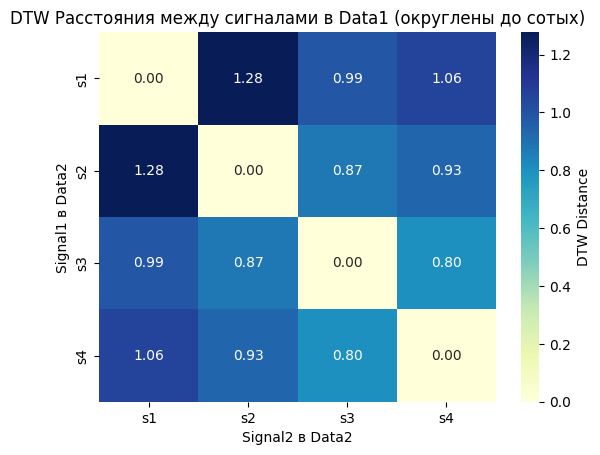

+----+---------+----------+----------+----------+
|    |      s1 |       s2 |       s3 |       s4 |
|----+---------+----------+----------+----------|
| s1 | 0       | 1.27748  | 0.98537  | 1.05959  |
| s2 | 1.27748 | 0        | 0.874994 | 0.932736 |
| s3 | 0.98537 | 0.874994 | 0        | 0.799521 |
| s4 | 1.05959 | 0.932736 | 0.799521 | 0        |
+----+---------+----------+----------+----------+


In [77]:
from fastdtw import fastdtw
import seaborn as sns
import matplotlib.pyplot as plt

# Создание списка для хранения DTW расстояний
dtw_distances_data1 = []

dtw_res = np.zeros([4, 4])
for i in [0, 1, 2, 3]:
    for j in [0, 1, 2, 3]:
        query = data2.iloc[:, [i]].to_numpy()[:, 0]
        template = data2.iloc[:, [j]].to_numpy()[:, 0]
        alignment_distance, _ = fastdtw(query, template)
        dtw_res[i, j] = alignment_distance

# Создание heatmap с использованием pivot
heatmap_data = pd.DataFrame(dtw_res, index=['s1', 's2', 's3', 's4'], columns=['s1', 's2', 's3', 's4'])
heatmap_data /= 1000

# Создание heatmap с использованием pivot с выводом DTW расстояний в виде 0.00, 1.00 и так далее
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'DTW Distance'})
plt.xlabel('Signal2 в Data2')
plt.ylabel('Signal1 в Data2')
plt.title('DTW Расстояния между сигналами в Data2 (округлены до сотых)')
plt.show()

print(tabulate(heatmap_data, headers='keys', tablefmt='psql'))

## DTW Дистанции между сигналами набора Data 1 и Data2

In [76]:
from fastdtw import fastdtw
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Создание списка для хранения DTW расстояний между Data1 и Data2
dtw_distances_data1_data2 = []

# Вычисление DTW расстояний между каждым временным рядом из Data1 и Data2
for i in range(len(data1.columns)):
    for j in range(len(data2.columns)):
        distance, _ = fastdtw(data1.iloc[:, i], data2.iloc[:, j])
        dtw_distances_data1_data2.append((f"s{i+1} (Data1)", f"s{j+1} (Data2)", distance))

# Преобразование списка DTW расстояний в DataFrame
dtw_distances_data1_data2_df = pd.DataFrame(dtw_distances_data1_data2, columns=["Signal1", "Signal2", "DTW Distance"])

# Преобразование столбца "DTW Distance" в числовой формат
dtw_distances_data1_data2_df["DTW Distance"] = pd.to_numeric(dtw_distances_data1_data2_df["DTW Distance"])

# Умножение значений в столбце "DTW Distance" на 1000 перед делением
dtw_distances_data1_data2_df["DTW Distance"] /= 1000

# Создание heatmap с использованием pivot с увеличенными DTW расстояниями
# sns.heatmap(dtw_distances_data1_data2_df.pivot(index='Signal1', columns='Signal2', values='DTW Distance'),
#             annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'DTW Distance'})
# plt.xlabel('Signal2 в Data2')
# plt.ylabel('Signal1 в Data1')
# plt.title('DTW Расстояния между сигналами в Data1 и Data2 (умножены на 1000 и округлены до сотых)')
# plt.show()

# Вывод DataFrame с DTW расстояниями
print(dtw_distances_data1_data2_df)


       Signal1     Signal2  DTW Distance
0   s1 (Data1)  s1 (Data2)      1.128617
1   s1 (Data1)  s2 (Data2)      1.008936
2   s1 (Data1)  s3 (Data2)      0.653445
3   s1 (Data1)  s4 (Data2)      0.785147
4   s2 (Data1)  s1 (Data2)      1.179678
5   s2 (Data1)  s2 (Data2)      1.003714
6   s2 (Data1)  s3 (Data2)      0.776793
7   s2 (Data1)  s4 (Data2)      0.808573
8   s3 (Data1)  s1 (Data2)      1.192935
9   s3 (Data1)  s2 (Data2)      0.868232
10  s3 (Data1)  s3 (Data2)      0.672373
11  s3 (Data1)  s4 (Data2)      0.840514
12  s4 (Data1)  s1 (Data2)      1.129366
13  s4 (Data1)  s2 (Data2)      0.886628
14  s4 (Data1)  s3 (Data2)      0.640888
15  s4 (Data1)  s4 (Data2)      0.758210


## Спектральная плотность мощности сигнала

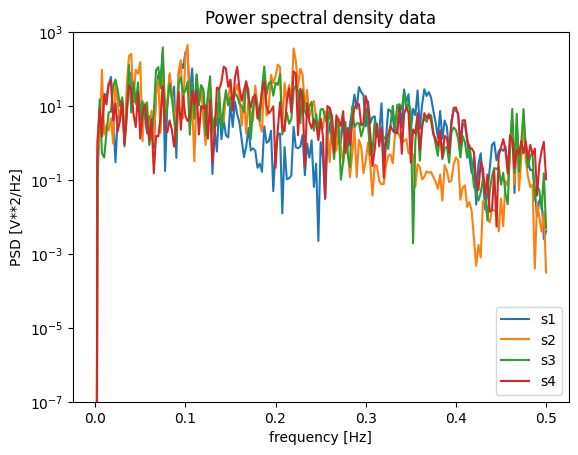

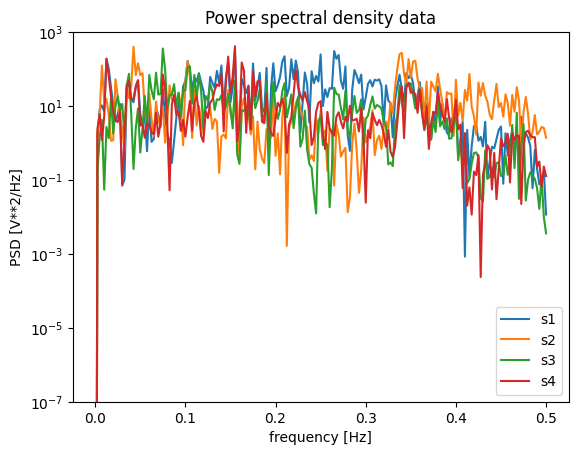

In [35]:
from scipy import signal

for i in [0,1,2,3]:
    data = data1.iloc[:, [i]].to_numpy().reshape(400)
    f, Pxx_den = signal.periodogram(data, 1)
    plt.semilogy(f, Pxx_den)
    plt.ylim([1e-7, 1e3])
    plt.xlabel('frequency [Hz]')
    plt.ylabel('PSD [V**2/Hz]')
    plt.legend(['s1', 's2', 's3','s4'])
    plt.title('Power spectral density data')
plt. show()

from scipy import signal
for i in [0,1,2,3]:
    data = data2.iloc[:, [i]].to_numpy().reshape(400)
    f, Pxx_den = signal.periodogram(data, 1)
    plt.semilogy(f, Pxx_den)
    plt.ylim([1e-7, 1e3])
    plt.xlabel('frequency [Hz]')
    plt.ylabel('PSD [V**2/Hz]')
    plt.legend(['s1', 's2', 's3','s4'])
    plt.title('Power spectral density data')
plt. show()


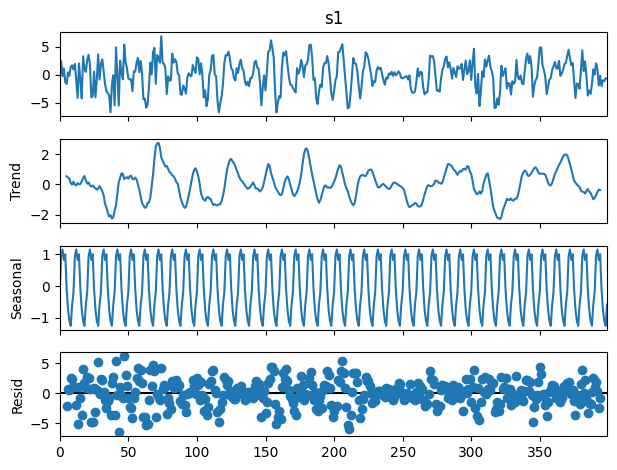

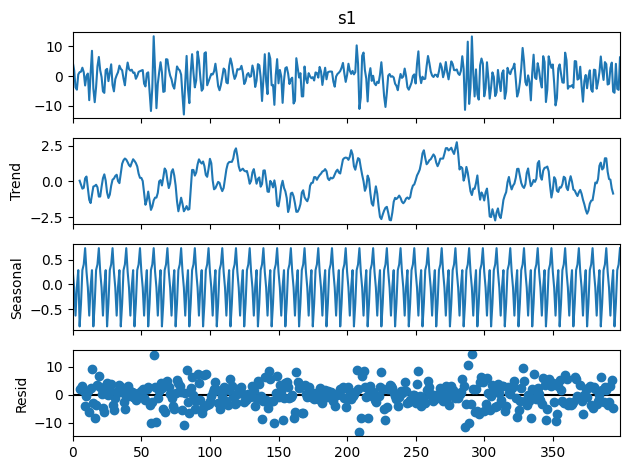

In [79]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Разложение временного ряда s1 из data1
decomposition_data1 = seasonal_decompose(data1.s1, model='additive', period=10)
decomposition_data1.plot()
plt.show()

# Разложение временного ряда s1 из data2
decomposition_data2 = seasonal_decompose(data2.s1, model='additive', period=10)
decomposition_data2.plot()
plt.show()
